# Mount at Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

# import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset
Natural Language Inference Dataset을 활용합니다   
(출처: https://klue-benchmark.com/tasks/68/overview/description)   


한 쌍의 문장은 Premise와 Hypothesis로 구성되어 있습니다.


premise 문장을 참고해 hypothesis 문장이 참인지(Entailment), 거짓인지(Contradiction), 혹은 참/거짓 여부를 알 수 없는 문장인지(Neutral)를 판별해야 합니다.



1. train_data.csv

├ Index : train data index

├ Premise : 실제 Text

├ Hypothesis : 가설 Text

└ Label : 참(Entailment) 또는 거짓(Contradiction) 또는 중립(Neutral)



*Premise와 Hypothesis의 관계를 추론



2. test_data.csv
├ Index : test data index

├ Premise : 실제 Text

├Hypothesis : 가설 Text

└Label : 추론해야 하는 Label 값



3. sample_submission.csv
├ Index : test data index

└Label : 추론해야 하는 Label 값

In [5]:
train = pd.read_csv('./dataset/train_data.csv', encoding='utf-8')
test = pd.read_csv('./dataset/test_data.csv', encoding='utf-8')

train.head(5)

,index,premise,hypothesis,label
0,0,"씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서, 소년이나 장정들이...",씨름의 여자들의 놀이이다.,contradiction
1,1,"삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나,...",자작극을 벌인 이는 3명이다.,contradiction
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다.,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다.,entailment
3,3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다.,neutral
4,4,"진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면, 이런 상황에서는...",이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다.,neutral


# Data Preprocessing   
## Check
* Size of dataset, null dataset   
* Columns
* Label imbalance
* Visualize
* Min, Max sequence lenght
* Using regular Expression

In [6]:
print(train.info(), end='\n\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       24998 non-null  int64 
 1   premise     24998 non-null  object
 2   hypothesis  24998 non-null  object
 3   label       24998 non-null  object
dtypes: int64(1), object(3)
memory usage: 781.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       1666 non-null   int64 
 1   premise     1666 non-null   object
 2   hypothesis  1666 non-null   object
 3   label       1666 non-null   object
dtypes: int64(1), object(3)
memory usage: 52.2+ KB
None


In [7]:
print('Train Columns: ', train.columns)
print('Test Columns: ', test.columns)

Train Columns:  Index(['index', 'premise', 'hypothesis', 'label'], dtype='object')
Test Columns:  Index(['index', 'premise', 'hypothesis', 'label'], dtype='object')


In [8]:
print('Train Label: ', train['label'].value_counts(), sep='\n', end='\n\n')
print('Test Label: ', test['label'].value_counts(), sep='\n')

Train Label: 
entailment       8561
contradiction    8489
neutral          7948
Name: label, dtype: int64

Test Label: 
answer    1666
Name: label, dtype: int64


In [9]:
print('Train Null: ', train.isnull().sum(), sep='\n', end='\n\n')
print('Test Null: ', test.isnull().sum(), sep='\n')

Train Null: 
index         0
premise       0
hypothesis    0
label         0
dtype: int64

Test Null: 
index         0
premise       0
hypothesis    0
label         0
dtype: int64


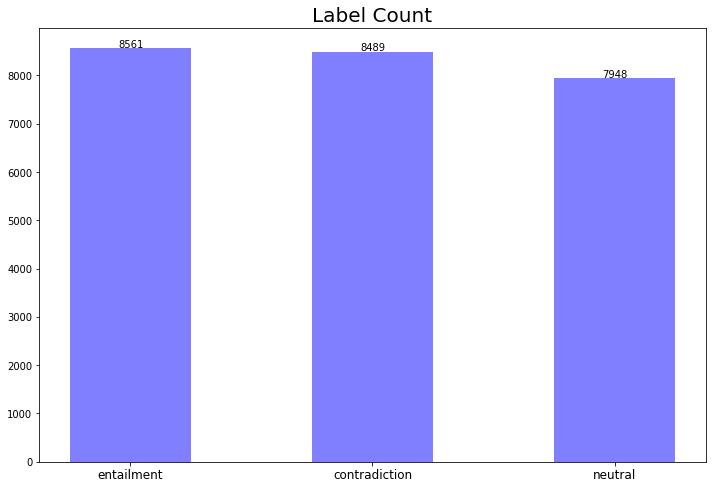

In [10]:
feature = train['label']

plt.figure(figsize=(10,7.5))
plt.title('Label Count', fontsize=20)

temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
plt.text(-0.05, temp.values[0]+20, s=temp.values[0])
plt.text(0.95, temp.values[1]+20, s=temp.values[1])
plt.text(1.95, temp.values[2]+20, s=temp.values[2])

plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [11]:
max_len = np.max(train['premise'].str.len())
min_len = np.min(train['premise'].str.len())
mean_len = np.mean(train['premise'].str.len())

print('Max Premise Length: ', max_len)
print('Min Premise Length: ', min_len)
print('Mean Premise Lenght: ', mean_len, '\n')

max_len = np.max(train['hypothesis'].str.len())
min_len = np.min(train['hypothesis'].str.len())
mean_len = np.mean(train['hypothesis'].str.len())

print('Max Hypothesis Length: ', max_len)
print('Min Hypothesis Length: ', min_len)
print('Mean Hypothesis Lenght: ', mean_len)

Max Premise Length:  90
Min Premise Length:  19
Mean Premise Lenght:  45.406552524201935 

Max Hypothesis Length:  103
Min Hypothesis Length:  5
Mean Hypothesis Lenght:  24.924433954716378


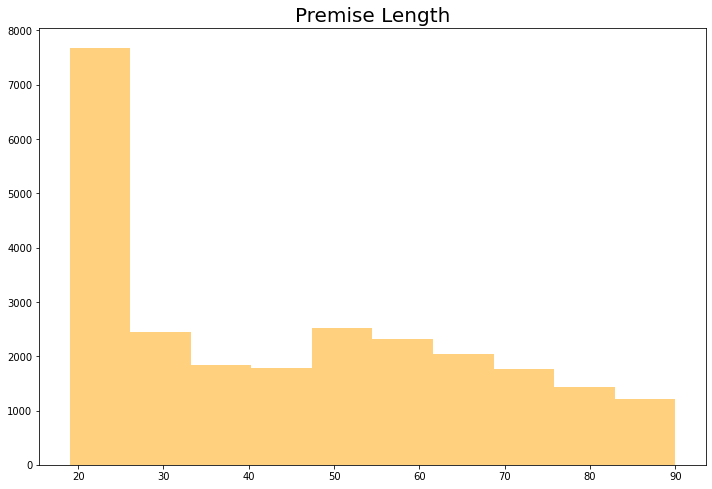

In [12]:
from collections import Counter

plt.figure(figsize=(10,7.5))
plt.title('Premise Length', fontsize=20)

plt.hist(train['premise'].str.len(), alpha=0.5, color='orange')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [13]:
train['premise'] = train['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test['premise'] = test['premise'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
train.head(5)

C:\Users\HSC\AppData\Local\Temp/ipykernel_19872/2884168859.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['premise'] = train['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
C:\Users\HSC\AppData\Local\Temp/ipykernel_19872/2884168859.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test['premise'] = test['premise'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")


,index,premise,hypothesis,label
0,0,씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서 소년이나 장정들이 ...,씨름의 여자들의 놀이이다.,contradiction
1,1,삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나 ...,자작극을 벌인 이는 3명이다.,contradiction
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다.,entailment
3,3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다.,neutral
4,4,진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면 이런 상황에서는 ...,이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다.,neutral


In [14]:
train['hypothesis'] = train['hypothesis'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test['hypothesis'] = test['hypothesis'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
train.head(5)

C:\Users\HSC\AppData\Local\Temp/ipykernel_19872/3031876097.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['hypothesis'] = train['hypothesis'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
C:\Users\HSC\AppData\Local\Temp/ipykernel_19872/3031876097.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test['hypothesis'] = test['hypothesis'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")


,index,premise,hypothesis,label
0,0,씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서 소년이나 장정들이 ...,씨름의 여자들의 놀이이다,contradiction
1,1,삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나 ...,자작극을 벌인 이는 3명이다,contradiction
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다,entailment
3,3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다,neutral
4,4,진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면 이런 상황에서는 ...,이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다,neutral


In [15]:
!pip install transformers

You should consider upgrading via the 'c:\users\hsc\documents\vs_workspace\pytorch17_cuda11\scripts\python.exe -m pip install --upgrade pip' command.


# Import transformers, pytorch

In [16]:
import os
import random
from tqdm import tqdm

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification, AutoConfig, AutoTokenizer

# Seed fixed

In [17]:
def seed_everything(seed:int = 1004):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore

seed_everything(42)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# Load Model
* Load RoBERTa-large model pretrained with KLUE Dataset
* Load tokenizer, configuration

In [18]:
MODEL_NAME = 'klue/roberta-large'

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

config = AutoConfig.from_pretrained(MODEL_NAME)
config.num_labels = 3

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, config=config)

print(model)
print(config)

Some weights of the model checkpoint at klue/roberta-large were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at klue/roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'cla

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(32000, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
         

# Tokenize Datasets

In [19]:
train_dataset, eval_dataset = train_test_split(train, test_size=0.2, shuffle=True, stratify=train['label'])

tokenized_train = tokenizer(
    list(train_dataset['premise']),
    list(train_dataset['hypothesis']),
    return_tensors="pt",
    max_length=256, # Max_Length = 190
    padding=True,
    truncation=True,
    add_special_tokens=True
)

tokenized_eval = tokenizer(
    list(eval_dataset['premise']),
    list(eval_dataset['hypothesis']),
    return_tensors="pt",
    max_length=256,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

print(tokenized_train['input_ids'][0])
print(tokenizer.decode(tokenized_train['input_ids'][0]))

tensor([    0, 30941,  2116, 11753,  5875, 12989,  2079, 14548,  2179,  3756,
         6941,  1510,  2103,  2291,  6911,  2522,  1432,  2348,  2284,  2052,
         7245,  3803,     2, 12989,  2145,  1510,  2103,  2291,  2073,  4273,
         2470,  1536,  2052,  1415,  2062,     2,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1])
[CLS] 이정재가 삼성그룹 부회장 이재용의 전처인 대상그룹 임세령 상무와 열애중이라고 합니다 [SEP] 이재용과 임세령은 결혼한 적이 없다 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD

# Make input Data
* Override torch.utils.data.Dataset
* Label embedding

In [20]:
class BERTDataset(torch.utils.data.Dataset):
    def __init__(self, pair_dataset, label):
        self.pair_dataset = pair_dataset
        self.label = label

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.pair_dataset.items()}
        item['label'] = torch.tensor(self.label[idx])
        
        return item

    def __len__(self):
        return len(self.label)

In [21]:
def label_to_num(label):
    label_dict = {"entailment": 0, "contradiction": 1, "neutral": 2, "answer": 3}
    num_label = []

    for v in label:
        num_label.append(label_dict[v])
    
    return num_label


train_label = label_to_num(train_dataset['label'].values)
eval_label = label_to_num(eval_dataset['label'].values)

In [22]:
train_dataset = BERTDataset(tokenized_train, train_label)
eval_dataset = BERTDataset(tokenized_eval, eval_label)

print(train_dataset.__len__())
print(train_dataset.__getitem__(19997))
print(tokenizer.decode(train_dataset.__getitem__(19997)['input_ids']))

19998
{'input_ids': tensor([    0, 22748,  2255, 19418, 12830,  2256,  2079, 16878,  6385,  7873,
         2170,  3708,  4713,  2999,  7285,  7389,  2371,  2062,     2, 22748,
         2255, 19418, 12830,  2256,  2259, 17291,  2318,  7873,  2371,  2062,
            2,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0,

# Define compute metrics

In [23]:
def compute_metrics(pred):
  """ validation을 위한 metrics function """
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  probs = pred.predictions

  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds)

  return {
      'accuracy': acc,
  }

# Hyper-parameters

In [24]:
training_ars = TrainingArguments(
    output_dir='./result',
    num_train_epochs=7,
    per_device_train_batch_size=16,
    save_total_limit=5,
    save_steps=500,
    evaluation_strategy='steps',
    eval_steps = 500,
    load_best_model_at_end = True,
)

trainer = Trainer(
    model=model,
    args=training_ars,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Train Model

In [25]:
trainer.train()
model.save_pretrained('./result/best_model')

c:\Users\HSC\Documents\VS_workspace\pytorch17_cuda11\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 19998
  Num Epochs = 7
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 8750
  6%|▌         | 500/8750 [04:08<1:07:16,  2.04it/s]***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 0.7082, 'learning_rate': 4.714285714285714e-05, 'epoch': 0.4}



  6%|▌         | 500/8750 [04:49<1:07:16,  2.04it/s]Saving model checkpoint to ./result\checkpoint-500
Configuration saved in ./result\checkpoint-500\config.json


{'eval_loss': 0.5326402187347412, 'eval_accuracy': 0.8158, 'eval_runtime': 40.6207, 'eval_samples_per_second': 123.09, 'eval_steps_per_second': 15.386, 'epoch': 0.4}


Model weights saved in ./result\checkpoint-500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-1000] due to args.save_total_limit
 11%|█▏        | 1000/8750 [08:31<48:53,  2.64it/s]***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 0.5843, 'learning_rate': 4.428571428571428e-05, 'epoch': 0.8}



 11%|█▏        | 1000/8750 [09:04<48:53,  2.64it/s]Saving model checkpoint to ./result\checkpoint-1000
Configuration saved in ./result\checkpoint-1000\config.json


{'eval_loss': 0.5029239058494568, 'eval_accuracy': 0.8306, 'eval_runtime': 33.0346, 'eval_samples_per_second': 151.357, 'eval_steps_per_second': 18.92, 'epoch': 0.8}


Model weights saved in ./result\checkpoint-1000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-1000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-1000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-1500] due to args.save_total_limit
 17%|█▋        | 1500/8750 [12:07<42:25,  2.85it/s]***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 0.464, 'learning_rate': 4.1428571428571437e-05, 'epoch': 1.2}



 17%|█▋        | 1500/8750 [12:38<42:25,  2.85it/s]Saving model checkpoint to ./result\checkpoint-1500
Configuration saved in ./result\checkpoint-1500\config.json


{'eval_loss': 0.4894998073577881, 'eval_accuracy': 0.8454, 'eval_runtime': 30.8307, 'eval_samples_per_second': 162.176, 'eval_steps_per_second': 20.272, 'epoch': 1.2}


Model weights saved in ./result\checkpoint-1500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-1500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-1500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-2000] due to args.save_total_limit
 23%|██▎       | 2000/8750 [15:41<39:44,  2.83it/s]***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 0.4216, 'learning_rate': 3.857142857142858e-05, 'epoch': 1.6}



 23%|██▎       | 2000/8750 [16:12<39:44,  2.83it/s]Saving model checkpoint to ./result\checkpoint-2000
Configuration saved in ./result\checkpoint-2000\config.json


{'eval_loss': 0.44190770387649536, 'eval_accuracy': 0.8564, 'eval_runtime': 30.8273, 'eval_samples_per_second': 162.194, 'eval_steps_per_second': 20.274, 'epoch': 1.6}


Model weights saved in ./result\checkpoint-2000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-2000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-2000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-2500] due to args.save_total_limit
 29%|██▊       | 2500/8750 [19:14<35:34,  2.93it/s]***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 0.4183, 'learning_rate': 3.571428571428572e-05, 'epoch': 2.0}



 29%|██▊       | 2500/8750 [19:45<35:34,  2.93it/s]Saving model checkpoint to ./result\checkpoint-2500
Configuration saved in ./result\checkpoint-2500\config.json


{'eval_loss': 0.4403087794780731, 'eval_accuracy': 0.8514, 'eval_runtime': 30.8468, 'eval_samples_per_second': 162.092, 'eval_steps_per_second': 20.261, 'epoch': 2.0}


Model weights saved in ./result\checkpoint-2500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-2500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-2500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-3000] due to args.save_total_limit
 34%|███▍      | 3000/8750 [22:47<33:43,  2.84it/s]***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 0.2986, 'learning_rate': 3.285714285714286e-05, 'epoch': 2.4}



 34%|███▍      | 3000/8750 [23:18<33:43,  2.84it/s]Saving model checkpoint to ./result\checkpoint-3000
Configuration saved in ./result\checkpoint-3000\config.json


{'eval_loss': 0.5606614351272583, 'eval_accuracy': 0.8536, 'eval_runtime': 30.7764, 'eval_samples_per_second': 162.462, 'eval_steps_per_second': 20.308, 'epoch': 2.4}


Model weights saved in ./result\checkpoint-3000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-3000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-3000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-500] due to args.save_total_limit
 40%|████      | 3500/8750 [26:20<30:45,  2.84it/s]***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 0.3032, 'learning_rate': 3e-05, 'epoch': 2.8}



 40%|████      | 3500/8750 [26:50<30:45,  2.84it/s]Saving model checkpoint to ./result\checkpoint-3500
Configuration saved in ./result\checkpoint-3500\config.json


{'eval_loss': 0.5065738558769226, 'eval_accuracy': 0.8602, 'eval_runtime': 30.7897, 'eval_samples_per_second': 162.392, 'eval_steps_per_second': 20.299, 'epoch': 2.8}


Model weights saved in ./result\checkpoint-3500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-3500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-3500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-1000] due to args.save_total_limit
 46%|████▌     | 4000/8750 [29:52<27:31,  2.88it/s]***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 0.2404, 'learning_rate': 2.714285714285714e-05, 'epoch': 3.2}



 46%|████▌     | 4000/8750 [30:23<27:31,  2.88it/s]Saving model checkpoint to ./result\checkpoint-4000
Configuration saved in ./result\checkpoint-4000\config.json


{'eval_loss': 0.7486757636070251, 'eval_accuracy': 0.8516, 'eval_runtime': 30.7964, 'eval_samples_per_second': 162.357, 'eval_steps_per_second': 20.295, 'epoch': 3.2}


Model weights saved in ./result\checkpoint-4000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-4000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-4000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-1500] due to args.save_total_limit
 51%|█████▏    | 4500/8750 [33:25<25:01,  2.83it/s]***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 0.212, 'learning_rate': 2.4285714285714288e-05, 'epoch': 3.6}



 51%|█████▏    | 4500/8750 [33:56<25:01,  2.83it/s]Saving model checkpoint to ./result\checkpoint-4500
Configuration saved in ./result\checkpoint-4500\config.json


{'eval_loss': 0.6514185667037964, 'eval_accuracy': 0.8562, 'eval_runtime': 30.8505, 'eval_samples_per_second': 162.072, 'eval_steps_per_second': 20.259, 'epoch': 3.6}


Model weights saved in ./result\checkpoint-4500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-4500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-4500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-2000] due to args.save_total_limit
 57%|█████▋    | 5000/8750 [36:58<21:18,  2.93it/s]***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 0.2196, 'learning_rate': 2.1428571428571428e-05, 'epoch': 4.0}



 57%|█████▋    | 5000/8750 [37:29<21:18,  2.93it/s]Saving model checkpoint to ./result\checkpoint-5000
Configuration saved in ./result\checkpoint-5000\config.json


{'eval_loss': 0.6307663917541504, 'eval_accuracy': 0.8576, 'eval_runtime': 30.8471, 'eval_samples_per_second': 162.09, 'eval_steps_per_second': 20.261, 'epoch': 4.0}


Model weights saved in ./result\checkpoint-5000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-5000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-5000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-3000] due to args.save_total_limit
 63%|██████▎   | 5500/8750 [40:30<18:55,  2.86it/s]***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 0.1404, 'learning_rate': 1.8571428571428572e-05, 'epoch': 4.4}



 63%|██████▎   | 5500/8750 [41:01<18:55,  2.86it/s]Saving model checkpoint to ./result\checkpoint-5500
Configuration saved in ./result\checkpoint-5500\config.json


{'eval_loss': 0.6729403138160706, 'eval_accuracy': 0.8656, 'eval_runtime': 30.8399, 'eval_samples_per_second': 162.128, 'eval_steps_per_second': 20.266, 'epoch': 4.4}


Model weights saved in ./result\checkpoint-5500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-5500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-5500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-3500] due to args.save_total_limit
 69%|██████▊   | 6000/8750 [44:02<16:08,  2.84it/s]***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 0.127, 'learning_rate': 1.5714285714285715e-05, 'epoch': 4.8}



 69%|██████▊   | 6000/8750 [44:33<16:08,  2.84it/s]Saving model checkpoint to ./result\checkpoint-6000
Configuration saved in ./result\checkpoint-6000\config.json


{'eval_loss': 0.7011218070983887, 'eval_accuracy': 0.8716, 'eval_runtime': 30.8613, 'eval_samples_per_second': 162.015, 'eval_steps_per_second': 20.252, 'epoch': 4.8}


Model weights saved in ./result\checkpoint-6000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-6000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-6000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-4000] due to args.save_total_limit
 74%|███████▍  | 6500/8750 [47:35<13:05,  2.86it/s]***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 0.1035, 'learning_rate': 1.2857142857142857e-05, 'epoch': 5.2}



 74%|███████▍  | 6500/8750 [48:05<13:05,  2.86it/s]Saving model checkpoint to ./result\checkpoint-6500
Configuration saved in ./result\checkpoint-6500\config.json


{'eval_loss': 0.810771107673645, 'eval_accuracy': 0.8742, 'eval_runtime': 30.8604, 'eval_samples_per_second': 162.02, 'eval_steps_per_second': 20.252, 'epoch': 5.2}


Model weights saved in ./result\checkpoint-6500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-6500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-6500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-4500] due to args.save_total_limit
 80%|████████  | 7000/8750 [51:06<10:07,  2.88it/s]***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 0.0747, 'learning_rate': 1e-05, 'epoch': 5.6}



 80%|████████  | 7000/8750 [51:37<10:07,  2.88it/s]Saving model checkpoint to ./result\checkpoint-7000
Configuration saved in ./result\checkpoint-7000\config.json


{'eval_loss': 0.7579001784324646, 'eval_accuracy': 0.8788, 'eval_runtime': 30.8471, 'eval_samples_per_second': 162.09, 'eval_steps_per_second': 20.261, 'epoch': 5.6}


Model weights saved in ./result\checkpoint-7000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-7000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-7000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-5000] due to args.save_total_limit
 86%|████████▌ | 7500/8750 [54:38<07:06,  2.93it/s]***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 0.071, 'learning_rate': 7.142857142857143e-06, 'epoch': 6.0}



 86%|████████▌ | 7500/8750 [55:08<07:06,  2.93it/s]Saving model checkpoint to ./result\checkpoint-7500
Configuration saved in ./result\checkpoint-7500\config.json


{'eval_loss': 0.7050883173942566, 'eval_accuracy': 0.8798, 'eval_runtime': 30.8498, 'eval_samples_per_second': 162.076, 'eval_steps_per_second': 20.259, 'epoch': 6.0}


Model weights saved in ./result\checkpoint-7500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-7500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-7500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-5500] due to args.save_total_limit
 91%|█████████▏| 8000/8750 [58:09<04:20,  2.88it/s]***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 0.0359, 'learning_rate': 4.285714285714286e-06, 'epoch': 6.4}



 91%|█████████▏| 8000/8750 [58:39<04:20,  2.88it/s]Saving model checkpoint to ./result\checkpoint-8000
Configuration saved in ./result\checkpoint-8000\config.json


{'eval_loss': 0.796450674533844, 'eval_accuracy': 0.8826, 'eval_runtime': 30.8386, 'eval_samples_per_second': 162.135, 'eval_steps_per_second': 20.267, 'epoch': 6.4}


Model weights saved in ./result\checkpoint-8000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-8000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-8000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-6000] due to args.save_total_limit
 97%|█████████▋| 8500/8750 [1:01:40<01:26,  2.88it/s]***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 0.0395, 'learning_rate': 1.4285714285714286e-06, 'epoch': 6.8}



 97%|█████████▋| 8500/8750 [1:02:10<01:26,  2.88it/s]Saving model checkpoint to ./result\checkpoint-8500
Configuration saved in ./result\checkpoint-8500\config.json


{'eval_loss': 0.7601208686828613, 'eval_accuracy': 0.8842, 'eval_runtime': 30.8529, 'eval_samples_per_second': 162.059, 'eval_steps_per_second': 20.257, 'epoch': 6.8}


Model weights saved in ./result\checkpoint-8500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-8500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-8500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-6500] due to args.save_total_limit
100%|██████████| 8750/8750 [1:03:44<00:00,  2.96it/s]

Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./result\checkpoint-2500 (score: 0.4403087794780731).
100%|██████████| 8750/8750 [1:03:45<00:00,  2.29it/s]
Configuration saved in ./result/best_model\config.json


{'train_runtime': 3825.2644, 'train_samples_per_second': 36.595, 'train_steps_per_second': 2.287, 'train_loss': 0.2556990654536656, 'epoch': 7.0}


Model weights saved in ./result/best_model\pytorch_model.bin


# Test

In [27]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

Tokenizer_NAME = "klue/roberta-large"
tokenizer = AutoTokenizer.from_pretrained(Tokenizer_NAME)

MODEL_NAME = './result/checkpoint-8500'
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
model.resize_token_embeddings(tokenizer.vocab_size)
model.to(device)

print(tokenizer)

loading file https://huggingface.co/klue/roberta-large/resolve/main/vocab.txt from cache at C:\Users\HSC/.cache\huggingface\transformers\4eb906e7d0da2b04e56c7cc31ba068d7c295240a51690153c2ced71c9e4c9fc5.d1b86bed49516351c7bb29b19d7e7be2ab53b931bcb1f9b2aacfb71f2124d25a
loading file https://huggingface.co/klue/roberta-large/resolve/main/tokenizer.json from cache at C:\Users\HSC/.cache\huggingface\transformers\360b579947002f14f22331a026821b56f70679f1be1e95fe5dc5a80edc4a59e0.44c30ade4958fcfd446e66025e10a5b380cdd0bbe9b3fb7a794f357e7f0f34c2
loading file https://huggingface.co/klue/roberta-large/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/klue/roberta-large/resolve/main/special_tokens_map.json from cache at C:\Users\HSC/.cache\huggingface\transformers\1a24ab4628028ed80dea35ce3334a636dc656fd9a17a09bad377f88f0cbecdac.70c17d6e4d492c8f24f5bb97ab56c7f272e947112c6faf9dd846da42ba13eb23
loading file https://huggingface.co/klue/roberta-large/resolve/main/tokeniz

PreTrainedTokenizerFast(name_or_path='klue/roberta-large', vocab_size=32000, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '[CLS]', 'eos_token': '[SEP]', 'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})


In [28]:
test_label = label_to_num(test['label'].values)

tokenized_test = tokenizer(
    list(test['premise']),
    list(test['hypothesis']),
    return_tensors="pt",
    max_length=128,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

test_dataset = BERTDataset(tokenized_test, test_label)

print(test_dataset.__len__())
print(test_dataset.__getitem__(1665))
print(tokenizer.decode(test_dataset.__getitem__(6)['input_ids']))

1666
{'input_ids': tensor([    0,   720,  3994,  2052, 10428,  2775,   647,  3657,  2119,  1085,
            3,     2,   720,  3994,  2052,   911,  2075,  3669,  2119,  3926,
         2088,  1513,  2359, 13964,     2,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [29]:
dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

model.eval()
output_pred = []
output_prob = []

for i, data in enumerate(tqdm(dataloader)):
    with torch.no_grad():
        outputs = model(
            input_ids=data['input_ids'].to(device),
            attention_mask=data['attention_mask'].to(device),
            token_type_ids=data['token_type_ids'].to(device)
        )
    logits = outputs[0]
    prob = F.softmax(logits, dim=-1).detach().cpu().numpy()
    logits = logits.detach().cpu().numpy()
    result = np.argmax(logits, axis=-1)

    output_pred.append(result)
    output_prob.append(prob)
  
pred_answer, output_prob = np.concatenate(output_pred).tolist(), np.concatenate(output_prob, axis=0).tolist()
print(pred_answer)

100%|██████████| 105/105 [00:08<00:00, 12.15it/s]

[1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 1, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 0, 2, 2, 2, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2, 

In [30]:
def num_to_label(label):
    label_dict = {0: "entailment", 1: "contradiction", 2: "neutral"}
    str_label = []

    for i, v in enumerate(label):
        str_label.append([i,label_dict[v]])
    
    return str_label

answer = num_to_label(pred_answer)
print(answer)

[[0, 'contradiction'], [1, 'neutral'], [2, 'entailment'], [3, 'contradiction'], [4, 'contradiction'], [5, 'neutral'], [6, 'neutral'], [7, 'neutral'], [8, 'entailment'], [9, 'neutral'], [10, 'contradiction'], [11, 'entailment'], [12, 'contradiction'], [13, 'entailment'], [14, 'neutral'], [15, 'neutral'], [16, 'neutral'], [17, 'neutral'], [18, 'contradiction'], [19, 'neutral'], [20, 'contradiction'], [21, 'neutral'], [22, 'neutral'], [23, 'entailment'], [24, 'contradiction'], [25, 'contradiction'], [26, 'entailment'], [27, 'entailment'], [28, 'entailment'], [29, 'neutral'], [30, 'contradiction'], [31, 'entailment'], [32, 'contradiction'], [33, 'neutral'], [34, 'neutral'], [35, 'neutral'], [36, 'entailment'], [37, 'contradiction'], [38, 'entailment'], [39, 'neutral'], [40, 'neutral'], [41, 'entailment'], [42, 'neutral'], [43, 'neutral'], [44, 'neutral'], [45, 'contradiction'], [46, 'neutral'], [47, 'entailment'], [48, 'contradiction'], [49, 'entailment'], [50, 'neutral'], [51, 'contradict

# Submission

In [31]:
df = pd.DataFrame(answer, columns=['index', 'label'])

df.to_csv('./result/submission.csv', index=False)

print(df)

      index          label
0         0  contradiction
1         1        neutral
2         2     entailment
3         3  contradiction
4         4  contradiction
...     ...            ...
1661   1661        neutral
1662   1662     entailment
1663   1663        neutral
1664   1664        neutral
1665   1665        neutral

[1666 rows x 2 columns]
